**Exercise 2**

In [1]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import random as rnd
import math

import scipy.interpolate as interp
def show_simulation(first_result,nodes):
    
    fig = plt.figure(1, figsize=(15,12))
    ax = plt.subplot()
    colors = ['g','b','m','y','r']
    
    time_unit = 60
    for node in nodes:
        particles_node = first_result[:,nodes.index(node)]
        particles_node_interp = interp.interp1d(np.arange(particles_node.size),particles_node)
        particles_node_compress = particles_node_interp(np.linspace(0,particles_node.size-1,time_unit))
        ax.plot(particles_node_compress,"-ok",label = node,color = colors[nodes.index(node)])
    ax.set_ylabel("Number of particles")
    ax.set_xlabel("Time units")
    ax.set_title(f"Interpolation of number of particles for each node in {time_limit} time units ")
    ax.legend()

def round_vector(vector,decimal=3):
    for i in range(len(vector)):
        vector[i] = round(vector[i],decimal)
    return vector
    
## CONSTRUCTION OF GRAPH G ##
nodes = ["o", "a", "b", "c", "d"]
edges = [("o", "a"), ("o", "b"), ("a", "b"), ("a", "c"), ("b", "o"), ("b", "c"), ("c", "b"), ("c", "d"), ("d", "a"), ("d", "c")]

G = nx.DiGraph(directed = True)
G.add_nodes_from(nodes)
G.add_edges_from(edges)

## TRANSITION MATRIX ##
# defining the transition matrix
t_m = [
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/2, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/3, 0, 1/3, 0]
]

w = np.sum(t_m, axis = 1)
w_star = np.max(w)
P = t_m/w_star
P = P + np.diag(np.ones(P.shape[0]) - np.sum(P, axis = 1))

(a) If 100 particles all start in node a, what is the average time for **the first** particle to return to
node a?

In [40]:
a_pos = nodes.index('a')
n_iterations = 1000
n_particles = 100
P_cum = np.cumsum(P, axis = 1)
exp_return_times = []
global_clock = n_particles * w_star

def check_return(current_particle_pos,a_pos):
    for elem in current_particle_pos:
        if elem == a_pos:
            return True
    
    return False
    
return_times = []
for _ in range(n_iterations):
    current_particle_pos = [-1 for _ in range(n_particles)]
    time = 0
    while not check_return(current_particle_pos,a_pos):
        
        particle_to_move = rnd.randint(0, n_particles - 1)
        current_pos = a_pos if current_particle_pos[particle_to_move] == -1 else next_hop
        next_hop = np.argwhere(P_cum[current_pos] > np.random.rand())[0][0]
        t_next = -np.log(np.random.rand()) / global_clock
        time = time + t_next

        current_particle_pos[particle_to_move]=next_hop

    return_times.append(time)

return_times = np.array(return_times)
exp_return_time = return_times.mean()
print(f"The expected return time for the first particle is:{round(exp_return_time,3)} seconds")

The expected return time for the first particle is:0.573 seconds


(b - *first point* ): If 100 particles start in node o, and the system is simulated for 60 time units, what is
the average number of particles in the different nodes at the end of the simulation?

In [41]:
n_iterations = 10
start_pos = nodes.index("o")
time_limit = 60
n_particles = 100

n_nodes = len(nodes)
global_clock = n_particles*w_star

num_particles_for_node = np.zeros((1,n_nodes))
num_particles_for_node[0][start_pos]=n_particles

previous_step=-1 #Index corresponding to the number of particles of each node for the previous step
time = 0
while time < time_limit:    
    normalized_numparticles_fornode = np.cumsum(num_particles_for_node[previous_step]/n_particles)
    selected_node = np.argwhere(normalized_numparticles_fornode > np.random.rand())[0][0]

    next_hop = np.argwhere(P_cum[selected_node] > np.random.rand())[0][0]

    next_state = num_particles_for_node[previous_step]
    next_state[selected_node]-=1
    next_state[next_hop]+=1

    num_particles_for_node = np.vstack([num_particles_for_node, next_state])

    t_next = -np.log(np.random.rand()) / global_clock
    time = time + t_next
    
mean_numparticles_fornode = num_particles_for_node.mean(0)
print(f"The average number at the end of simulation ({time_limit} time units) is:{round_vector(mean_numparticles_fornode,3)}")

The average number at the end of simulation (60 time units) is:[20.41  14.851 20.997 21.691 22.051]


( b - *second point* ) Illustrate the simulation above with a plot showing the number of particles in each node
during the simulation time.

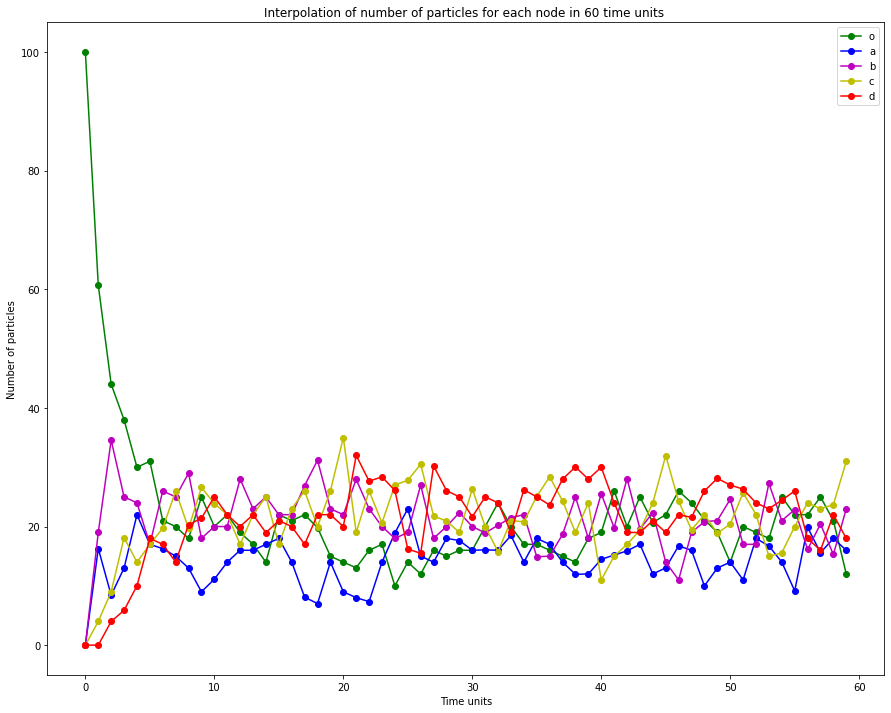

In [41]:
show_simulation(first_result,nodes)

( b - *third point* ) Compare the simulation result in the first point above with the stationary distribution of
the continuous-time random walk followed by the single particles.

In [42]:
analytical_pi_bar = [5/27,4/27,6/27,6/27,6/27]
for i in range(len(analytical_pi_bar)):
    analytical_pi_bar[i] = round(analytical_pi_bar[i],3)
normalized_mean_numparticles_fornode = mean_numparticles_fornode/n_particles
for i in range(len(normalized_mean_numparticles_fornode)):
    normalized_mean_numparticles_fornode[i] = round(normalized_mean_numparticles_fornode[i],3)

analytical_pi_bar = np.array(analytical_pi_bar)
normalized_mean_numparticles_fornode = np.array(normalized_mean_numparticles_fornode)
print(f"Stationary distribution obtained analytically:{analytical_pi_bar}")
print(f"Approx. of stationary distribution obtained with {time_limit} time units is:{round_vector(normalized_mean_numparticles_fornode)}")
print(f"The percentage variation between the theoretical result and the simulated result obtained with {time_limit} time units is:\n{abs(round_vector((- analytical_pi_bar + normalized_mean_numparticles_fornode)/analytical_pi_bar))}")

Stationary distribution obtained analytically:[0.185 0.148 0.222 0.222 0.222]
Approx. of stationary distribution obtained with 60 time units is:[0.204 0.149 0.21  0.217 0.221]
The percentage variation between the theoretical result and the simulated result obtained with 60 time units is:
[0.103 0.007 0.054 0.023 0.005]
